![title](img/pod_slogan.png)

--------------

**_© Todos os direitos reservados - 2018-2020 POWER OF DATA_**

--------------

# Introdução ao Geopandas - Manipulação de Dados e Operações Espaciais

Nesta seção, aprenderemos os conceitos básicos de manipulação e operações básicas com dados geográficos usando o **Geopandas**.

- O Geopandas é construído sobre as bibliotecas **Pandas** e **Numpy**
- Assim como o Pandas, a estrutura de dados do Geopandas contém `GeoDataFrame` e `GeoSeries`
- O Geopandas fornece não apenas a capacidade de ler e manipular dados geográficos facilmente, mas também pode executar muitas operações geoespaciais essenciais, incluindo, entre outras, operações e projeções geométricas que são emprestadas da biblioca **Shapely**

Conteúdos:

- 1) Lendo Dados Espaciais
- 2) Lendo Arquivos .csv e conversão para `GeoDataFrame`
- 3) Trabalhando com subconjunto de dados
- 4) Projeções e CRS (*Coordinate Reference System*)
- 5) Realizando *joins* espaciais
- 6) _Buffer Analysis_
- 7) _Overlay Analysis_
- 8) _Nearest Neighbour_

## 1) Lendo Dados Espaciais

Dados em vetores podem estar em diferentes formatos (**_shapefiles_**, **_geopackage_**, **_geojson_**, etc).
O `Geopandas` facilita a importação desses arquivos, através da função: 

`gdp.read_file(path/to/file)`

### Arquivos .shp

- O **_Esri Shapefile_** ou simplesmente **_shapefile_** é um formato popular de arquivo contendo dados geoespaciais em forma de vetor
- Descrevem geometrias: pontos, linhas, e polígonos. Entre outras coisas, essas geometrias podem representar elementos como: poços, rios, e lagos
- E cada item pode ter atributos que os descrevem, por exemplo: nome, temperatura ou profundidade

In [1]:
### Instalar bibliotecas ###

#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [2]:
### Importar bibliotecas ###

import geopandas as gpd
%matplotlib inline

In [3]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'Neighborhoods_Philadelphia.shp'
neighborhoods_philadelphia = gpd.read_file(sys_path + shp_path)
neighborhoods_philadelphia.shape

(158, 6)

In [4]:
neighborhoods_philadelphia.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


- Para visualizações rápidas, utilize o `geo_df.plot` para plotar mapas fácilmente

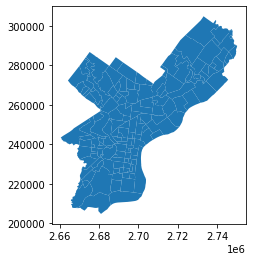

In [5]:
neighborhoods_philadelphia.plot()

## 2) Lendo Arquivos .csv e conversão para `GeoDataFrame`

Os **_valores separados por vírgula (.csv)_** são predominantemente os arquivos mais usados na ciência de dados. Muitos conjuntos de dados, no entanto, possuem componentes geográficos (latitude / longitude) que podem ser **_facilmente convertidos em geometrias e podem ser usados ainda mais para análise geospacial_**.

In [6]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [7]:
### Importar bibliotecas ###

import pandas as pd
import geopandas as gpd
%matplotlib inline

In [8]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
csv_path = 'incidents.csv'
incidents = pd.read_csv(sys_path + csv_path)
incidents.shape

(68010, 15)

In [9]:
incidents.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706


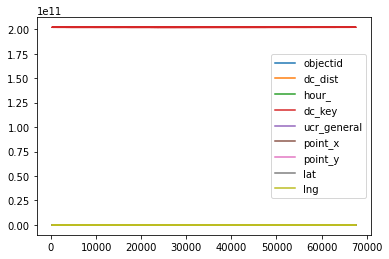

In [10]:
incidents.sample(50).plot()

- Configuramos as coordenadas (Latitude e Longitude) como uma geometria enquanto criamos o `GeoDataFrame`

- Usamos `gpd.points_from_xy()` para transformar as colunas que representam as coordenadas

In [11]:
### Convertendo DataFrame para GeoDataFrame ###

gdf_incidents = gpd.GeoDataFrame(incidents, 
                                 geometry=gpd.points_from_xy(incidents.lat,incidents.lng),
                                 crs=neighborhoods_philadelphia.crs)
gdf_incidents.shape

(68010, 16)

In [12]:
gdf_incidents.head(5)

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (39.96233 -75.16145)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (39.88388 -75.23071)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (39.88388 -75.23071)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (39.88388 -75.23071)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (39.88388 -75.23071)


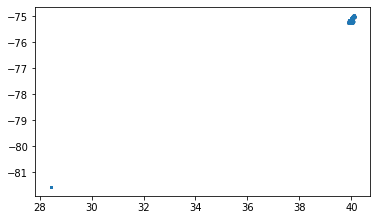

In [13]:
gdf_incidents.plot(markersize=0.2)

In [14]:
gdf_incidents_clean = gdf_incidents[(gdf_incidents["lat"]>38)]
gdf_incidents_clean.shape

(67338, 16)

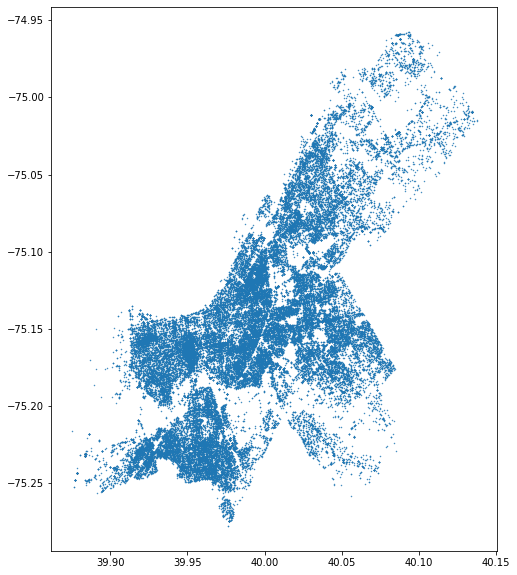

In [15]:
gdf_incidents_clean.plot(figsize=(16,10),
                         markersize=0.2)

### Salvando dados em formato espacial

- Não é ideal ler seu arquivo e convertê-lo o tempo todo. Isso custa tempo e recursos computacionais
- Então, vamos converter os dados CSV com `geodataframe.tofile()` para o formato espacial: `.shp` e `.geojson`

In [16]:
### Salvar ".shp" ###

sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'incidents.shp'
gdf_incidents_clean.sample(5000).to_file(sys_path + shp_path)

## 3) Trabalhando com subconjuntos de dados

- Grandes conjuntos de dados estão por toda parte. No entanto, pode ser complicado ler e manipular conjuntos inteiros de dados
- Nesse caso, você precisa trabalhar com subconjunto dos dados

In [17]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [18]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'countries.shp'
countries = gpd.read_file(sys_path + shp_path)
countries.shape

(255, 12)

In [19]:
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [20]:
### Inspecionar Países da América do Sul ###

countries[countries["CONTINENT"] == "South America"]

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Argentina,44293293,879400.0,2017,2010,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
23,Suriname,591919,8547.0,2017,2004,2016,6. Developing region,3. Upper middle income,South America,Americas,South America,"POLYGON ((-54.08080 3.30931, -54.11429 3.28538..."
24,Guyana,737718,6093.0,2017,2002,2016,6. Developing region,4. Lower middle income,South America,Americas,South America,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
45,Brazil,207353391,3081000.0,2017,2010,2016,3. Emerging region: BRIC,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
46,Uruguay,3360148,73250.0,2017,2004,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"POLYGON ((-53.37909 -33.74068, -53.39635 -33.7..."
136,Ecuador,16290913,182400.0,2017,2010,2016,6. Developing region,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-78.82868 1.43431, -78.76997 1..."
137,Colombia,47698524,688000.0,2017,2006,2016,6. Developing region,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


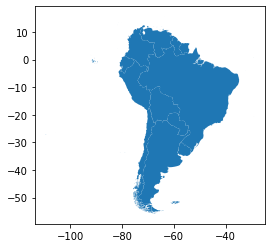

In [21]:
countries[countries["CONTINENT"] == "South America"].plot()

Agora, vamos ler o subconjunto de países da América do Sul da base de dados da [Armed Conflict Location and Event Data Project (ACLED)](https://acleddata.com/)

- Há dois métodos para ler dados por subconjunto: `gdp.mask` e `gdp.rows`

In [22]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'acled2019.shp'
south_america_acled_mask = gpd.read_file(sys_path + shp_path, mask = countries[countries["CONTINENT"] == "South America"])
south_america_acled_mask.shape

(21751, 32)

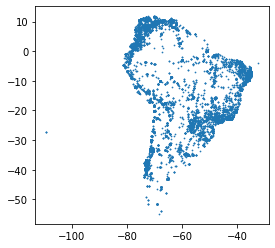

In [23]:
south_america_acled_mask.plot(markersize=0.5)

In [24]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'acled2019.shp'
south_america_acled_rows = gpd.read_file(sys_path + shp_path, rows = 1000)
south_america_acled_rows.shape

(1000, 32)

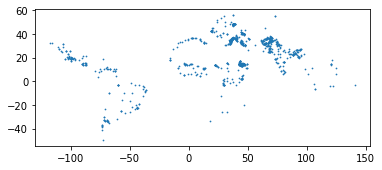

In [25]:
south_america_acled_rows.plot(markersize=0.5)

In [26]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'acled2019.shp'

south_america_acled_slice = gpd.read_file(sys_path + shp_path, rows = slice(900,1900))
south_america_acled_slice.shape

(1000, 32)

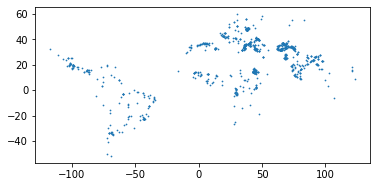

In [27]:
south_america_acled_slice.plot(markersize=0.5)

## 4) Projeções e CRS (*Coordinate Reference System*)

- Os sistemas de referência de coordenadas representam como nossos dados em duas dimensões (planares) se relacionam com locais reais na Terra (**_a Terra não é plana, ok ?_**)
- É a cola que mantém os atributos em seus respectivos locais
- O `GeoDataFrame` possuí o atributo `.crs` que pode fornecer o CRS original usado nos dados
- Os sistemas de coordenadas projetadas, por outro lado, informa aos dados como desenhar em uma superfície plana, como em um mapa em papel ou em uma tela de computador
- Para realizar projeções e análises, é necessário ter o mesmo CRS para que os valores dos dados façam sentido

In [28]:
### Instalar bibliotecas ###

#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [29]:
### Importar bibliotecas ###

import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [30]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'countries.shp'
countries = gpd.read_file(sys_path + shp_path)
countries.shape

(255, 12)

In [31]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
countries.head(5)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [33]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'acled2019.shp'
acled = gpd.read_file(sys_path + shp_path)
acled.shape

(198761, 32)

In [34]:
acled.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
acled.head(5)

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


In [36]:
countries.crs.name == acled.crs.name

True

- Projetaremos a latitude e longitude com a projeção de **_Mercator (3395)_** em nossos dados
- Utilize `gdf.to_crs()` para converter o padrão de coordenadas do `GeoDataFrame`


- OBS 1: lembrando que você pode procurá-las no site da [European Petroleum Survey Group (EPSG)](https://epsg.io/) e [Spatial Reference](https://spatialreference.org/)

- OBS 2: Lembrando que esta projeção é esticada ao longo do eixo x e do eixo y à medida que você se afasta do Equador

In [37]:
### Inspecione a geometria dos países até a 5 casa decimal ###
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [38]:
### Mude o padrão CRS do GeoDataFrame com '.to_crs' ###

## Remova "Antarctica" e "French Southern and Antarctic Lands" do GeoDataFrame
countries = countries[(countries.NAME != "Antarctica") & (countries.NAME != "Fr. S. Antarctic Lands")]

## Converta os dados na Projeção de Mercator (epsg=3395)
countries_mercator = countries.to_crs(epsg=3395)

## Inspecione a geometria dos países até a 5 casa decimal
countries_mercator['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

In [39]:
countries.crs.name == countries_mercator.crs.name

False

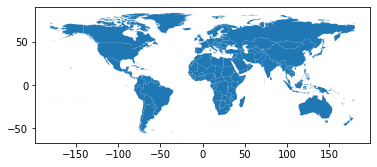

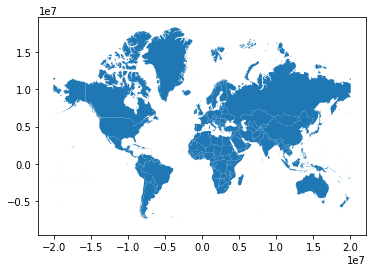

In [40]:
### Vamos comparar as duas projeções visualmente ###

countries.plot();
countries_mercator.plot();

- Observe as diferentes escalas de x e y nos dois mapas. Se você tentar sobrepor os dados, eles não se alinharão de forma correta
- Vamos ver se podemos traçar os dados de conflitos da ACLED sobre a base de dados com CRS da Mercator

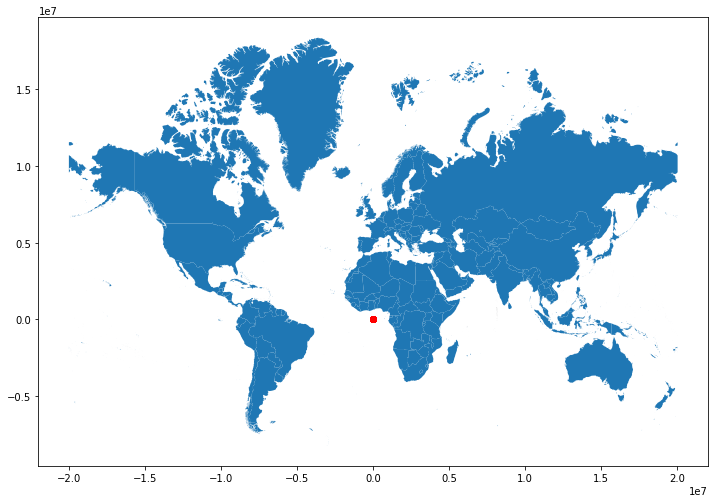

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
countries_mercator.plot(ax=ax)
acled.plot(ax=ax, color='red') # Estão no Padrão WGS84

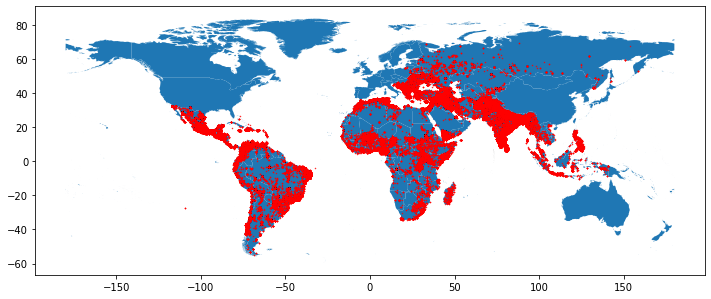

In [42]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax) # Estão no Padrão WGS84
acled.plot(ax=ax, color='red', markersize=0.2) # Estão no Padrão WGS84

## 5) Realizando _joins_ espaciais

O **_spatial join_**, diferentemente do clássico **_table join_**, usa associações espaciais entre as camadas envolvidas para anexar campos de uma camada para outra.

- O **_spatial join_** é dinâmico e exigem que os resultados sejam salvos em uma nova camada de saída

- O Geopandas facilita o cruzamento de informações geoespaciais, através da função: `gpd.sjoin()`

In [43]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [44]:
### Importar bibliotecas ###

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [45]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'Neighborhoods_Philadelphia.shp'
neighborhoods_philadelphia = gpd.read_file(sys_path + shp_path)
neighborhoods_philadelphia.shape

(158, 6)

In [46]:
neighborhoods_philadelphia.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


In [47]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'incidents.shp'
incidents = gpd.read_file(sys_path + shp_path)
incidents.shape

(5000, 16)

In [48]:
incidents.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,234687,8,2,08/03/2020 23:46,08/03/2020,23:46:00,23,2.020080e+11,3300 BLOCK GRANT AVE,600,Thefts,-75.005262,40.068885,40.068885,-75.005262,POINT (40.06889 -75.00526)
1,3516497,18,2,20/06/2020 11:01,20/06/2020,11:01:00,11,2.020180e+11,5100 BLOCK LARCHWOOD AVE,700,Motor Vehicle Theft,-75.224729,39.951748,39.951748,-75.224729,POINT (39.95175 -75.22473)
2,3126688,18,3,13/05/2020 17:19,13/05/2020,17:19:00,17,2.020180e+11,4200 BLOCK LOCUST ST,600,Thefts,-75.207633,39.953531,39.953531,-75.207633,POINT (39.95353 -75.20763)
3,3483297,26,2,19/06/2020 14:59,19/06/2020,14:59:41,14,2.020260e+11,1200 BLOCK N FRANKLIN ST,1700,Other Sex Offenses (Not Commercialized),-75.148593,39.971070,39.971070,-75.148593,POINT (39.97107 -75.14859)
4,1628889,18,2,29/01/2020 21:49,29/01/2020,21:49:00,21,2.020180e+11,5200 BLOCK MARKET ST,1800,Narcotic / Drug Law Violations,-75.225288,39.959977,39.959977,-75.225288,POINT (39.95998 -75.22529)


### Diferenciando _table joins_ e _spatial joins_

In [49]:
country_shapes = countries[['geometry', 'NAME']]
country_shapes.head()

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru


In [50]:
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [51]:
country_names = countries[['NAME', 'POP_EST']]
country_names.head()

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


In [52]:
type(country_names)

pandas.core.frame.DataFrame

In [53]:
### Cruzamento das Tabelas pelo Nome dos Países ###

country_gdf_merge = country_shapes.merge(country_names, on='NAME', how='left')
country_gdf_merge.head()

,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,17789267
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,11138234
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,31036656


In [54]:
type(country_gdf_merge)

geopandas.geodataframe.GeoDataFrame

- As duas tabelas que cruzamos acima foram unidas por **nenhum critério geoespacial**, apenas com atributos da tabela em si
- Isso é chamado de **_table join_**

Podemos realizar um **_spatial join_** entre dois objetos com geometrias. O `gpd.sjoin()` permite essa operação. E possuí dois argumentos principais:


- `how` determina o tipo de join, se será *inner*, *right*, *left*
- `op` determina se o cruzamento deve associar os atributos de um objeto ao outro

    - intersects: Os atributos serão unidos se o limite e o interior do objeto se cruzarem de alguma forma com o limite e/ou o interior do outro objeto
    - within: os atributos serão unidos se o limite e o interior do objeto se cruzarem apenas com o interior do outro objeto (não com o limite ou o exterior)
    - contains: os atributos serão unidos se o interior do objeto contiver o limite e o interior do outro objeto e seus limites não tocarem

In [55]:
conflict_gdf = acled[['event_id_c', 'event_date','fatalities', 'geometry']]
conflict_gdf.head()

,event_id_c,event_date,fatalities,geometry
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410)
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410)
2,YEM45984,31 December 2019,1,POINT (47.15700 14.20810)
3,IND68948,31 December 2019,0,POINT (85.83380 20.27240)
4,SLV861,31 December 2019,1,POINT (-89.23830 13.58940)


In [56]:
type(conflict_gdf)

geopandas.geodataframe.GeoDataFrame

In [57]:
### Cruzamento das Tabelas pelas Geometrias ###

conflicts_in_countries = gpd.sjoin(conflict_gdf, country_shapes, how='inner', op='within')
conflicts_in_countries.head(10)

,event_id_c,event_date,fatalities,geometry,index_right,NAME
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410),161,Yemen
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410),161,Yemen
2,YEM45984,31 December 2019,1,POINT (47.15700 14.20810),161,Yemen
15,YEM45977,31 December 2019,0,POINT (46.67110 14.94030),161,Yemen
35,YEM45956,31 December 2019,0,POINT (44.99050 12.88530),161,Yemen
37,YEM45972,31 December 2019,0,POINT (49.12420 14.54250),161,Yemen
40,YEM45976,31 December 2019,3,POINT (45.05000 15.51670),161,Yemen
42,YEM45974,31 December 2019,0,POINT (49.33220 14.65000),161,Yemen
44,YEM45979,31 December 2019,0,POINT (46.83190 14.53770),161,Yemen
46,YEM45975,31 December 2019,0,POINT (43.10780 16.27120),161,Yemen


- Cada ponto de conflito é correspondido com o país correspondente com base na localização pois usamos `op='within'` do qual leva o ponto de conflito que está dentro do polígono de um país

- Aqui também poderíamos usar `op='intersects'` e poderíamos usar `op='contains'` e descobrir quais países contêm os pontos da cidade

In [58]:
### Cruzamento das Tabelas pelas Geometrias ###

conflicts_in_countries = gpd.sjoin(conflict_gdf, country_shapes, how='inner', op='intersects')
conflicts_in_countries.head(10)

,event_id_c,event_date,fatalities,geometry,index_right,NAME
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410),161,Yemen
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410),161,Yemen
2,YEM45984,31 December 2019,1,POINT (47.15700 14.20810),161,Yemen
15,YEM45977,31 December 2019,0,POINT (46.67110 14.94030),161,Yemen
35,YEM45956,31 December 2019,0,POINT (44.99050 12.88530),161,Yemen
37,YEM45972,31 December 2019,0,POINT (49.12420 14.54250),161,Yemen
40,YEM45976,31 December 2019,3,POINT (45.05000 15.51670),161,Yemen
42,YEM45974,31 December 2019,0,POINT (49.33220 14.65000),161,Yemen
44,YEM45979,31 December 2019,0,POINT (46.83190 14.53770),161,Yemen
46,YEM45975,31 December 2019,0,POINT (43.10780 16.27120),161,Yemen


In [59]:
### Cruzamento das Tabelas pelas Geometrias ###

conflicts_in_countries = gpd.sjoin(conflict_gdf, country_shapes, how='inner', op='contains')
conflicts_in_countries.head(10)

,event_id_c,event_date,fatalities,geometry,index_right,NAME


## 6) _Buffer Analysis_

A análise de *buffer* é uma tarefa importante de geoprocessamento. É amplamente utilizado em diferentes aplicações para obter uma distância em torno de um ponto/linha/polígono, e assim, identificar ou selecionar _features_ que caem dentro ou fora dos limites do *buffer*.

In [60]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [61]:
### Importar bibliotecas ###

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [62]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'BRUFE250GC_SIR.shp'
br_ufs = gpd.read_file(sys_path + shp_path)
br_ufs.shape

(27, 4)

In [63]:
br_ufs.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
1,ALAGOAS,NORDESTE,27,"POLYGON ((-35.46659 -8.81764, -35.46658 -8.817..."
2,AMAPÃ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
3,BAHIA,NORDESTE,29,"MULTIPOLYGON (((-38.65484 -18.04242, -38.65819..."
4,CEARÃ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."


In [64]:
### Gerando Centróides ###

br_ufs['geometry'] = br_ufs.geometry.to_crs(epsg=3395)

br_ufs_centroids = br_ufs.geometry.centroid
br_ufs_centroids.head()

0    POINT (-7844719.718 -1023600.335)
1    POINT (-4077073.218 -1056982.885)
2      POINT (-5783692.785 159712.149)
3    POINT (-4644266.372 -1393339.877)
4     POINT (-4409965.036 -564340.121)
dtype: geometry

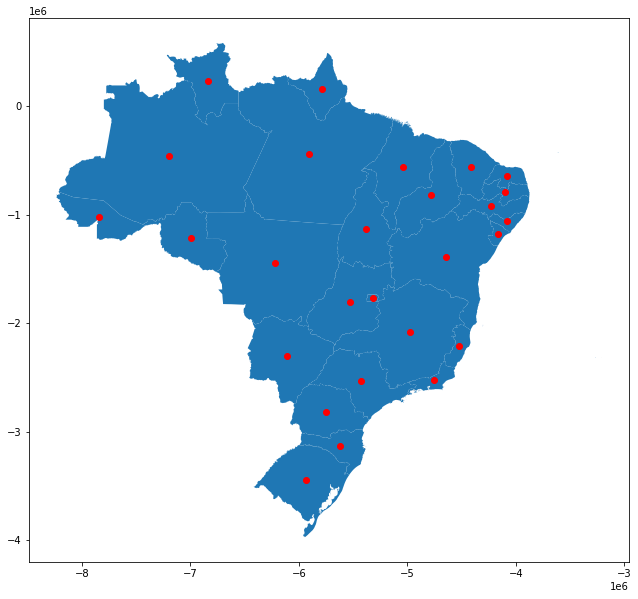

In [65]:
### Plotando Centróides ###

fig, ax = plt.subplots(figsize=(12,10))
br_ufs.plot(ax=ax)
br_ufs_centroids.plot(ax=ax, color='red')

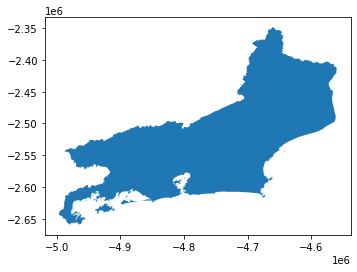

In [66]:
### Filtre apenas Rio de Janeiro ###

RJ = br_ufs[br_ufs["NM_ESTADO"] == "RIO DE JANEIRO"]
RJ.plot()

In [67]:
RJ.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [68]:
RJ['geometry'] = RJ.geometry.to_crs(epsg=3395)

RJ_centroid = RJ.geometry.centroid
RJ_centroid.head()

C:\Users\gusb1\Anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


16    POINT (-4749519.251 -2519309.322)
dtype: geometry

In [69]:
RJ_centroid.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

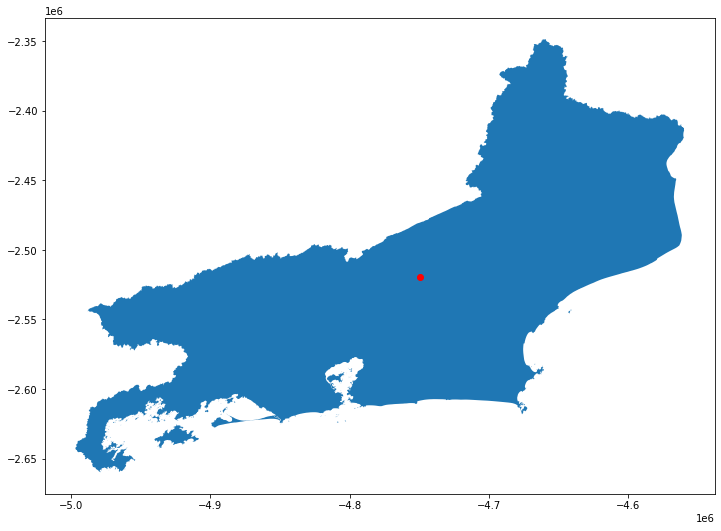

In [70]:
fig, ax = plt.subplots(figsize=(12,10))
RJ.plot(ax=ax)
RJ_centroid.plot(ax=ax, color='red') 

- Segundo, vamos gerar *buffers* em torno dos *centroids* com a função `.buffer()`

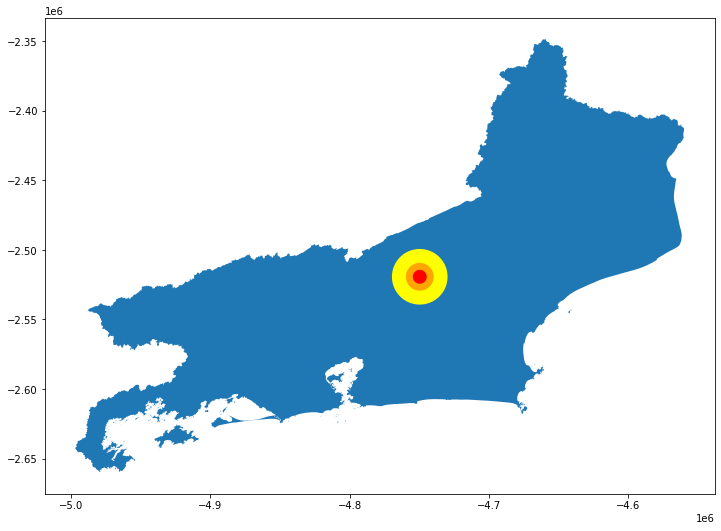

In [71]:
### Plotando Buffers###

RJ_centroid_05km = RJ_centroid.buffer(5000)
RJ_centroid_10km = RJ_centroid.buffer(10000)
RJ_centroid_20km = RJ_centroid.buffer(20000)

fig, ax = plt.subplots(figsize=(12,10))
RJ.plot(ax=ax)
RJ_centroid_20km.plot(ax=ax, color='yellow')
RJ_centroid_10km.plot(ax=ax, color='orange')
RJ_centroid_05km.plot(ax=ax, color='red')
plt.show()

## 7) _Overlay Analysis_

Às vezes, precisamos criar novas *features* a partir de diferentes tipos de dados, como pontos, linhas e polígonos. As operações de conjunto ou sobreposições desempenham um papel importante aqui.

In [72]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#!pip install pyproj
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [73]:
### Importar bibliotecas ###

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyproj import Proj
%matplotlib inline

- O `Geopandas` possuí alguns datasets para fins didáticos, podemos inspecioná-los com `gpd.datasets.available`

In [74]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

- Para importá-los, utilize gpd.datasets.get_path() seguido do `gpd.read_file()`

In [75]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [76]:
capitals.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


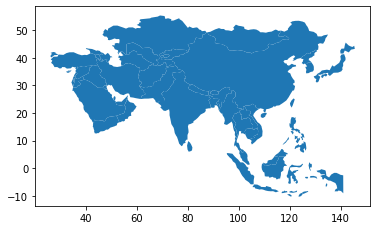

In [77]:
asia = world[world['continent'] == "Asia"]
asia = asia[['geometry', 'name']]
asia.plot()

In [78]:
asia = asia.to_crs("epsg:3395") 
capitals = capitals.to_crs("epsg:3395")

In [79]:
capitals['geometry']= capitals.buffer(500000)
capitals.head()

,name,geometry
0,Vatican City,"POLYGON ((1886304.649 5117957.424, 1883897.012..."
1,San Marino,"POLYGON ((1885011.519 5425900.277, 1882603.882..."
2,Vaduz,"POLYGON ((1559390.800 5932596.001, 1556983.163..."
3,Luxembourg,"POLYGON ((1182388.791 6346728.171, 1179981.154..."
4,Palikir,"POLYGON ((18105174.611 766692.137, 18102766.97..."


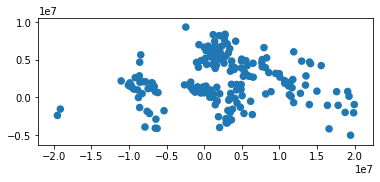

In [80]:
capitals.plot()

O `gpd.overlay()` permite a análise de sobreposição entre os *buffers* em torno das capitais e os territórios dos países asiáticos. A função se apoia na chamada:

- `how` determina o tipo de join, se será *intersection*, *union*, *identity*, *symmetric_difference* or *difference*

In [81]:
asia_cores = gpd.overlay(asia, capitals, how='intersection')
asia_cores

,name_1,name_2,geometry
0,Kazakhstan,Dushanbe,"POLYGON ((7791184.568 5113139.577, 7688840.268..."
1,Uzbekistan,Dushanbe,"POLYGON ((7415184.485 5070176.387, 7426573.749..."
2,Pakistan,Dushanbe,"POLYGON ((7956597.920 4233485.213, 7932888.321..."
3,Afghanistan,Dushanbe,"POLYGON ((7404817.438 4463862.784, 7466841.908..."
4,Tajikistan,Dushanbe,"POLYGON ((7550801.019 4433533.078, 7613366.233..."
...,...,...,...
210,Yemen,Asmara,"POLYGON ((4806108.874 1553327.530, 4796527.981..."
211,Saudi Arabia,Asmara,"POLYGON ((4809847.630 1868931.340, 4762173.489..."
212,Yemen,Hargeysa,"POLYGON ((5158050.430 1492854.507, 5107070.270..."
213,Yemen,Sanaa,"POLYGON ((5394750.626 1561149.252, 5369935.059..."


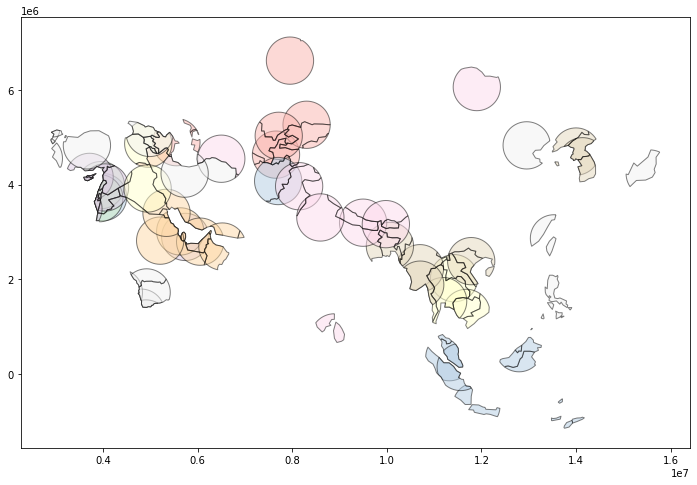

In [82]:
asia_cores.plot(figsize=(12,10),
                alpha=0.5,
                edgecolor='k',
                cmap='Pastel1')

In [83]:
asia_out_cores = gpd.overlay(asia, capitals, how='difference')
asia_out_cores

,geometry,name
5,"POLYGON ((9724867.413 6279047.498, 9640131.701...",Kazakhstan
6,"POLYGON ((6230350.563 5029760.556, 6225978.591...",Uzbekistan
8,"MULTIPOLYGON (((15696071.624 -287609.878, 1569...",Indonesia
87,"POLYGON ((4600816.910 4282166.348, 4596349.211...",Iraq
88,"POLYGON ((6424263.773 2199051.065, 6433008.701...",Oman
91,"POLYGON ((11042411.877 1057756.627, 11045386.9...",Thailand
92,"POLYGON ((11845683.242 1756991.434, 11862338.1...",Laos
93,"MULTIPOLYGON (((11144711.965 2458228.046, 1116...",Myanmar
94,"POLYGON ((11972132.109 1690600.508, 11974028.1...",Vietnam
95,"MULTIPOLYGON (((14558363.413 5165271.819, 1455...",North Korea


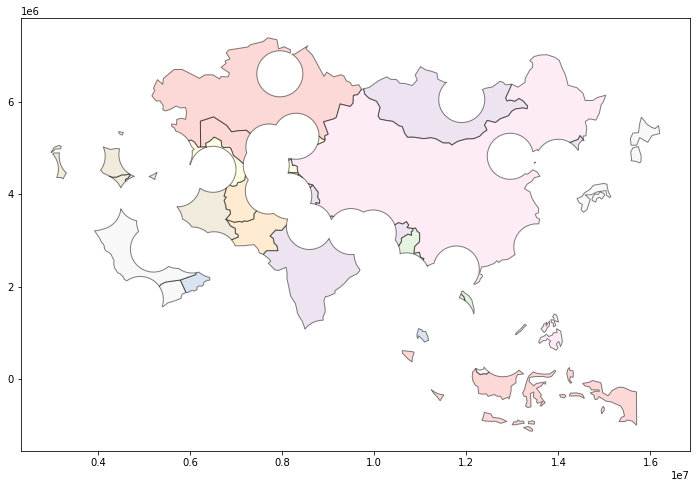

In [84]:
asia_out_cores.plot(figsize=(12,10),
                    alpha=0.5,
                    edgecolor='k',
                    cmap='Pastel1')

In [85]:
asia_symmetric_cores = gpd.overlay(asia, capitals, how='symmetric_difference')
asia_symmetric_cores

,name_1,name_2,geometry
0,Kazakhstan,NaN,"POLYGON ((9724867.413 6279047.498, 9640131.701..."
1,Uzbekistan,NaN,"POLYGON ((6230350.563 5029760.556, 6225978.591..."
2,Indonesia,NaN,"MULTIPOLYGON (((15696071.624 -287609.878, 1569..."
3,Iraq,NaN,"POLYGON ((4600816.910 4282166.348, 4596349.211..."
4,Oman,NaN,"POLYGON ((6424263.773 2199051.065, 6433008.701..."
...,...,...,...
219,NaN,Cairo,"POLYGON ((3909719.747 3236856.038, 3894248.744..."
220,NaN,Tokyo,"MULTIPOLYGON (((16056838.901 4232706.081, 1605..."
221,NaN,Paris,"POLYGON ((759529.088 6220400.627, 757121.452 6..."
222,NaN,Santiago,"POLYGON ((-7366835.616 -3931379.516, -7369243...."


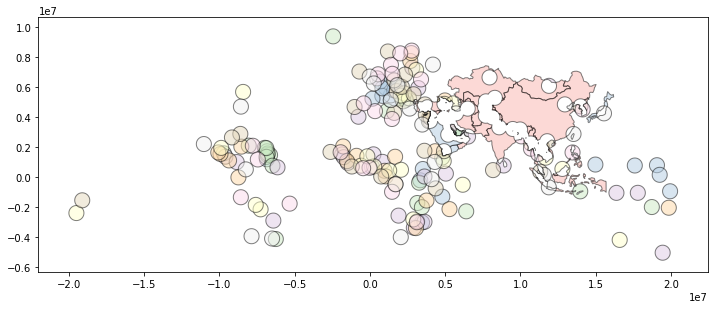

In [86]:
asia_symmetric_cores.plot(figsize=(12,10),
                          alpha=0.5,
                          edgecolor='k',
                          cmap='Pastel1')

In [87]:
asia_union_cores = gpd.overlay(asia, capitals, how='union')
asia_union_cores

,name_1,name_2,geometry
0,Kazakhstan,Dushanbe,"POLYGON ((7791184.568 5113139.577, 7688840.268..."
1,Uzbekistan,Dushanbe,"POLYGON ((7415184.485 5070176.387, 7426573.749..."
2,Pakistan,Dushanbe,"POLYGON ((7956597.920 4233485.213, 7932888.321..."
3,Afghanistan,Dushanbe,"POLYGON ((7404817.438 4463862.784, 7466841.908..."
4,Tajikistan,Dushanbe,"POLYGON ((7550801.019 4433533.078, 7613366.233..."
...,...,...,...
434,NaN,Cairo,"POLYGON ((3909719.747 3236856.038, 3894248.744..."
435,NaN,Tokyo,"MULTIPOLYGON (((16056838.901 4232706.081, 1605..."
436,NaN,Paris,"POLYGON ((759529.088 6220400.627, 757121.452 6..."
437,NaN,Santiago,"POLYGON ((-7366835.616 -3931379.516, -7369243...."


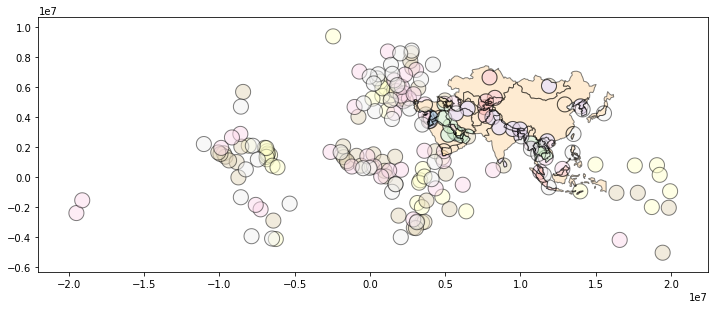

In [88]:
asia_union_cores.plot(figsize=(12,10),
                      alpha=0.5,
                      edgecolor='k',
                      cmap='Pastel1')

In [89]:
asia_identity_cores = gpd.overlay(asia, capitals, how='identity')
asia_identity_cores

,name_1,name_2,geometry
0,Kazakhstan,Dushanbe,"POLYGON ((7791184.568 5113139.577, 7688840.268..."
1,Uzbekistan,Dushanbe,"POLYGON ((7415184.485 5070176.387, 7426573.749..."
2,Pakistan,Dushanbe,"POLYGON ((7956597.920 4233485.213, 7932888.321..."
3,Afghanistan,Dushanbe,"POLYGON ((7404817.438 4463862.784, 7466841.908..."
4,Tajikistan,Dushanbe,"POLYGON ((7550801.019 4433533.078, 7613366.233..."
...,...,...,...
238,Philippines,NaN,"MULTIPOLYGON (((14068202.537 933857.926, 14079..."
239,Malaysia,NaN,"POLYGON ((12493726.662 141811.453, 12445246.16..."
240,Japan,NaN,"MULTIPOLYGON (((16098293.005 5429719.461, 1617..."
241,Yemen,NaN,"POLYGON ((5788614.612 2141032.017, 5875685.877..."


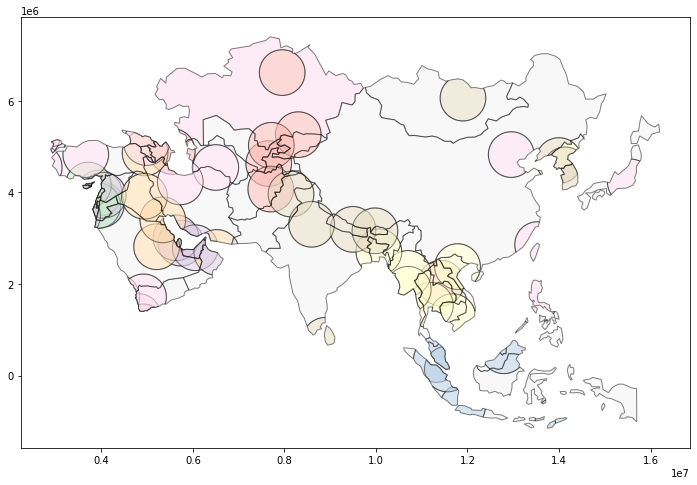

In [90]:
asia_identity_cores.plot(figsize=(12,10),
                         alpha=0.5,
                         edgecolor='k',
                         cmap='Pastel1')

## 8) _Nearest Neighbour_

Encontrar o vizinho mais próximo (*nearest neighbour*) de um objeto para outro é uma tarefa comum de análise de dados espaciais. Por exemplo, determinar o ponto de serviço mais próximo da sua casa é um problema de otimização que requer a realização o uso desse algorítmo.

In [91]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install matplotlib
#!pip install folium
#!pip install shapely
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda

In [92]:
### Importar bibliotecas ###

import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import folium 
from shapely.ops import nearest_points
from shapely.geometry import LineString
%matplotlib inline

In [93]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
csv_path = 'stations.csv'
stations = pd.read_csv(sys_path + csv_path)
stations.shape

(300, 5)

In [94]:
### Importando Dados Espaciais ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
csv_path = 'points.csv'
points = pd.read_csv(sys_path + csv_path)
points.shape

(498, 3)

In [95]:
stations.head()

,id,name,dpcapacity,xcoord,ycoord
0,5,State St & Harrison St,19,-87.627739,41.873958
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500
2,14,Morgan St & 18th St,15,-87.651073,41.858086
3,15,Racine Ave & 19th St,15,-87.656471,41.856453
4,16,Wood St & North Ave,15,-87.672516,41.910329


In [96]:
points.head()

,id,xcoord,ycoord
0,1,-87.675992,41.969792
1,2,-87.676702,41.956395
2,3,-87.601501,41.805379
3,4,-87.616656,41.858263
4,5,-87.706869,41.963010


- O primeiro passo é construir objetos geoespaciais com `gpd.GeoDataFrame()`

In [97]:
def create_gdf(df, x="xcoord", y="ycoord"):
    gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df[x],df[y]), crs = "epsg:4326")
    return gdf

In [98]:
stations_gdf = create_gdf(stations)
points_gdf = create_gdf(points)

In [99]:
stations_gdf.head()

,id,name,dpcapacity,xcoord,ycoord,geometry
0,5,State St & Harrison St,19,-87.627739,41.873958,POINT (-87.62774 41.87396)
1,13,Wilton Ave & Diversey Pkwy,19,-87.652681,41.932500,POINT (-87.65268 41.93250)
2,14,Morgan St & 18th St,15,-87.651073,41.858086,POINT (-87.65107 41.85809)
3,15,Racine Ave & 19th St,15,-87.656471,41.856453,POINT (-87.65647 41.85645)
4,16,Wood St & North Ave,15,-87.672516,41.910329,POINT (-87.67252 41.91033)


In [100]:
points_gdf.head()

,id,xcoord,ycoord,geometry
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640)
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538)
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826)
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301)


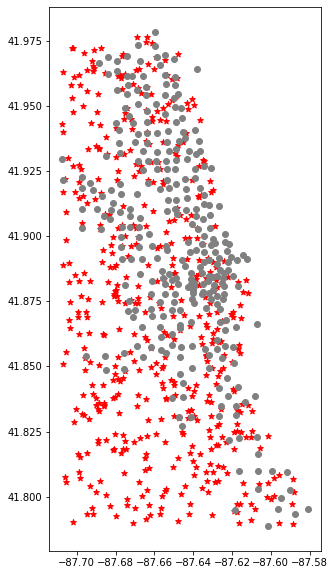

In [101]:
fig, ax = plt.subplots(figsize=(12,10))

points_gdf.plot(ax=ax, color="Red", marker= "*")
stations_gdf.plot(ax=ax, color="grey")
plt.show()

- Depois, vamos estabelecer as "**_uniões unárias_**", que são as representação da união dos objetos geométricos fornecidos com a `gdf.unary_union`

- Em seguida, podemos calcular os "**_vizinhos mais próximos_**" utilizando as uniões unárias entre as estações de bicicletas com a `gdf.nearest_points`

- Para facilitar a execução do processo, vamos encapsular as duas etapas em uma função que encontra a geometria e o valor que corresponde os pontos mais próximos:

In [102]:
def get_nearest_points(row, destination, val, col="geometry"):
    
    # 1) Cria União Unária
    dest_unary = destination["geometry"].unary_union
    
    # 2) Encontra o ponto mais próximo
    nearest_geom = nearest_points(row[col], dest_unary)
    
    # 3) Encontre a geometria correspondende
    match_geom = destination.loc[destination.geometry == nearest_geom[1]]
    
    # 4) Encontre o valor correspondende
    match_value = match_geom[val].to_numpy()[0]
    return match_value

In [103]:
points_gdf["nearest_geom"] = points_gdf.apply(get_nearest_points,
                                              destination=stations_gdf,
                                              val="geometry",
                                              axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909)
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927)
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835)
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611)
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555)


In [104]:
points_gdf["nearest_station"] = points_gdf.apply(get_nearest_points,
                                                 destination=stations_gdf,
                                                 val="name",
                                                 axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave


- A melhor forma de conectar dois pontos é através de uma reta, então vamos definir uma linha através de `LineString()`
- Para obter a geometria da linha obtida, usamos `gdf.set_geometry()`

In [105]:
points_gdf['line'] = points_gdf.apply(lambda row: LineString([row['geometry'], row['nearest_geom']]), axis=1)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_geom,nearest_station,line
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),POINT (-87.67423700000001 41.96909),Ravenswood Ave & Lawrence Ave,LINESTRING (-87.67599211881929 41.969792417635...
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),POINT (-87.679259 41.955927),Lincoln Ave & Belle Plaine Ave,LINESTRING (-87.6767023973826 41.9563952204838...
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),POINT (-87.59938299999999 41.809835),Greenwood Ave & 47th St,"LINESTRING (-87.601501134953 41.8053785205414,..."
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),POINT (-87.619407 41.857611),Calumet Ave & 18th St,LINESTRING (-87.61665568206151 41.858262512299...
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),POINT (-87.68848699999999 41.966555),Western Ave & Leland Ave,LINESTRING (-87.7068694739994 41.9630104417897...


In [106]:
line_gdf = points_gdf[["id", "nearest_station", "line"]].set_geometry('line')
line_gdf.crs =  "epsg:4326"

In [107]:
points_gdf.drop(["nearest_geom", "line"], axis=1, inplace=True)
points_gdf.head()

,id,xcoord,ycoord,geometry,nearest_station
0,1,-87.675992,41.969792,POINT (-87.67599 41.96979),Ravenswood Ave & Lawrence Ave
1,2,-87.676702,41.956395,POINT (-87.67670 41.95640),Lincoln Ave & Belle Plaine Ave
2,3,-87.601501,41.805379,POINT (-87.60150 41.80538),Greenwood Ave & 47th St
3,4,-87.616656,41.858263,POINT (-87.61666 41.85826),Calumet Ave & 18th St
4,5,-87.706869,41.963010,POINT (-87.70687 41.96301),Western Ave & Leland Ave


- Agora, vamos visualizar qual a relação entre as pessoas e os pontos mais próximos

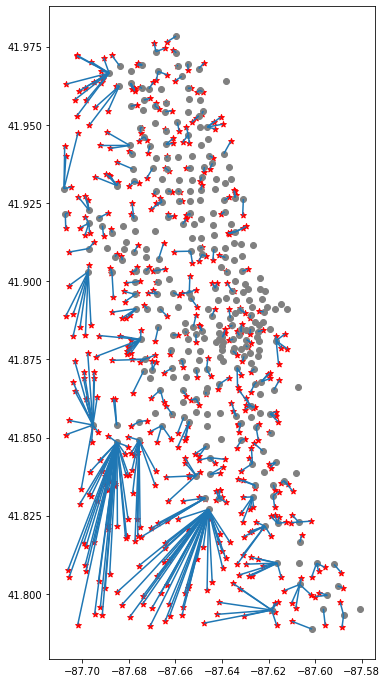

In [108]:
fig, ax = plt.subplots(figsize=(16,12))

points_gdf.plot(ax=ax, color="Red", marker= "*")
stations_gdf.plot(ax=ax, color="grey")
line_gdf.plot(ax=ax)

plt.show()

- Mas essa visualização está horrível, que tal colocá-la em um mapa interativo com ajuda da biblioteca `folium`

In [109]:
m = folium.Map([41.805379, -87.601501],
               zoom_start = 12,
               tiles='CartoDb dark_matter')

locs_stations = zip(stations_gdf.ycoord, stations_gdf.xcoord)
locs_points = zip(points_gdf.ycoord, points_gdf.xcoord)

for location in locs_stations:
    folium.CircleMarker(location=location, color="red", radius=4).add_to(m)
for location in locs_points:
    folium.CircleMarker(location=location, color="white", radius=3).add_to(m)
    
folium.GeoJson(line_gdf).add_to(m)
m.save("output/map_nearest_neighbour.html")
m

--------------

## Sigam a PowerOfData nas Redes Sociais:

- **[LinkedIn](https://www.linkedin.com/company/powerofdata/)**
- **[Medium](https://medium.com/powerofdata)**
- **[Instagram](https://www.instagram.com/powerofdatabr/)**
- Dúvidas, sugestões e *feedbacks*: gustavo.bruschi@powerofdata.com

### <center> **_Agradeço a leitura! Se você achou útil e interessante, por favor compartilhe com amigos e colegas._** </center>
--------------